# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn import datasets, svm, model_selection, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Read the dataset

In [2]:
df = pd.read_csv("tweets.csv")
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


# 3. Split the dataset into X and y

In [3]:
X=df["status"]
y=df["author"]

# 4. Split the dataset into training set and testing set

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.30, random_state=32)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [6]:
countVector = CountVectorizer()
tfidfVector = TfidfVectorizer()

In [7]:
x_train_count= countVector.fit_transform(X_train)
x_train_tfidf= tfidfVector.fit_transform(X_train)

In [8]:
x_test_count= countVector.transform(X_test)
x_test_tfidf= tfidfVector.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_count=LogisticRegression()
log_tfidf=LogisticRegression()

In [11]:
log_count.fit(x_train_count , y_train)
log_tfidf.fit(x_train_tfidf , y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [12]:
from sklearn.svm import SVC

In [13]:
svm_count = SVC()
svm_tfidf = SVC()

In [14]:
svm_count.fit(x_train_count , y_train)
svm_tfidf.fit(x_train_tfidf , y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

### Logistic Regression

In [17]:
log_count_preduction = log_count.predict(x_test_count)
log_tfidf_prediction = log_tfidf.predict(x_test_tfidf)


In [21]:
score_log_count = accuracy_score(y_test, log_count_preduction)
score_log_tfidf = accuracy_score(y_test, log_tfidf_prediction)

print("Logistic Regression Score count: " , score_log_count)
print("Logistic Regression Score Tfidf: " , score_log_tfidf)

Logistic Regression Score count:  0.925
Logistic Regression Score Tfidf:  0.925


### SVM

In [22]:
svm_count_preduction = svm_count.predict(x_test_count)
svm_tfidf_prediction = svm_tfidf.predict(x_test_tfidf)

In [23]:
score_svm_count = accuracy_score(y_test, svm_count_preduction)
score_svm_tfidf = accuracy_score(y_test, svm_tfidf_prediction)

print("SVM Score count: " , score_svm_count)
print("SVM Score Tfidf: " , score_svm_tfidf)

SVM Score count:  0.9083333333333333
SVM Score Tfidf:  0.925


# 9. Plot a confusion matrix for both Logistic Regression and SVM

### Logistic Regression

In [33]:
log_count_cm = confusion_matrix(y_test , log_count_preduction)
log_tfidf_cm = confusion_matrix( y_test , log_tfidf_prediction)

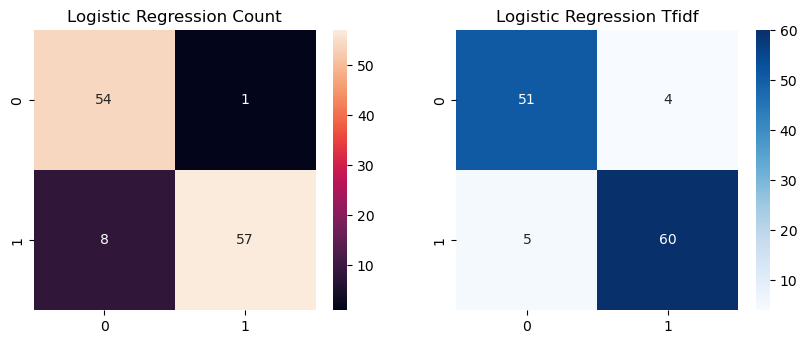

In [38]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(log_tfidf_cm, annot = True)
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(log_count_cm, annot=True, cmap = 'Blues')
plt.title('Logistic Regression Tfidf')


plt.show()


### SVM

In [36]:
svm_count_cm = confusion_matrix(y_test , svm_count_preduction)
svm_tfidf_cm = confusion_matrix( y_test , svm_tfidf_prediction)

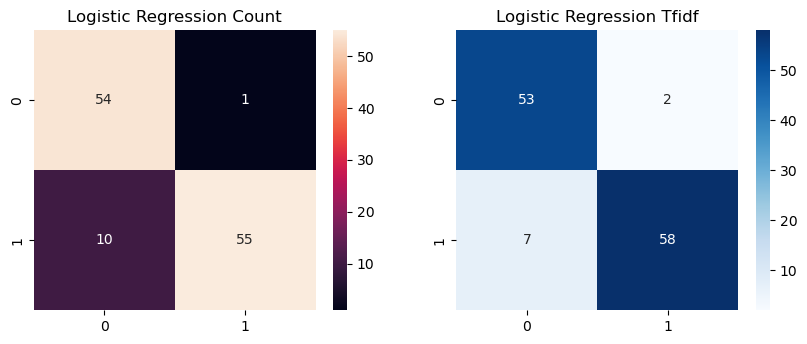

In [39]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(svm_count_cm, annot = True)
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(svm_tfidf_cm, annot=True, cmap = 'Blues')
plt.title('Logistic Regression Tfidf')


plt.show()

